# **Marketing Campaign A/B Testing and Regression Analysis**

## **Problem Statement**  
Marketing campaigns are a crucial tool for driving product sales, but their success often depends on careful planning and evaluation. To determine the effectiveness of a new advertising campaign, a randomized A/B test was conducted. The test aims to compare the performance of a group exposed to advertisements (experimental group) against a control group exposed to public service announcements (PSAs). This analysis will identify whether the campaign successfully drives conversions and the potential financial impact of the ads. Furthermore, regression analysis will be performed to explore the relationship between user behaviors (e.g., number of ads seen) and conversion rates.

---

## **Objectives**  
1. Evaluate the effectiveness of the ad campaign compared to the PSA control group through A/B testing.  
2. Determine whether the difference in conversion rates between the experimental and control groups is statistically significant.  
3. Quantify the success attributable to the ads by estimating the financial impact.  
4. Perform regression analysis to:  
   - Identify the key predictors of user conversions (e.g., total ads seen, time of day).  
   - Develop a predictive model for conversion likelihood based on user behavior.  

---

## **Research Questions**  
1. **A/B Testing Questions:**  
   - Does the experimental group (ads) have a significantly higher conversion rate than the control group (PSAs)?  
   - What is the magnitude of the impact of ads on conversion rates?  

2. **Regression Analysis Questions:**  
   - Will be folmulated based on the Hypothesis Testing Result


# **Loading Dependencies and Data**

In [ ]:
# Basic libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical computations

# Visualization libraries
import matplotlib.pyplot as plt   # For creating static visualizations
import seaborn as sns             # For advanced statistical visualizations

# Statistical analysis
import scipy.stats as stats       # For A/B testing and statistical tests
from statsmodels.stats.proportion import proportions_ztest  # For Z-tests on proportions
import statsmodels.api as sm      # For regression analysis
import statsmodels.formula.api as smf  # For formula-based regression models

# Machine learning for predictive modeling (if required later)
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
from sklearn.preprocessing import MinMaxScaler # For scale the features
import tensorflow as tf # For neural network model

# Other utilities
import warnings
warnings.filterwarnings('ignore')  # To suppress unnecessary warnings

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A B Test/Marketing Campaign/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# **Exploratory Data Analysis and Data Cleaning**

### **Checking Shapes, Data Types, Null & Duplicate Values, Unnecessary Columns**

In [ ]:
df.shape

(588101, 7)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
user id,int64
test group,object
converted,bool
total ads,int64
most ads day,object
most ads hour,int64


**All columns data types are appropriate**

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


**There is no null values present in the dataset**

In [ ]:
df.duplicated().sum()

0

**There is no duplicate rows**

In [ ]:
df['user id'].nunique() == len(df)

True

**User ID is unique in each rows that means each row represents a single user. So it is not necessary to analyze with the User ID further.**

In [ ]:
# Drop the unnecessary columns

df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [ ]:
df.describe()

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


#### **Summary**

**Variables:**

* **total:** This variable likely represents the total number of ads viewed by each user.
* **most_ads:** This variable could represent the maximum number of ads viewed by a user within a specific time period (e.g., a day, week).
* **hour:** This variable might represent the average number of hours per day that users spend viewing ads.

**Summary Statistics:**

* **count:** This shows that there are 588,101 data points for each variable.
* **mean:**
    * The average total number of ads viewed per user is 24.82.
    * The average maximum number of ads viewed within a given time period is 14.47.
    * The average number of hours spent viewing ads per day is not provided.
* **std:**
    * The standard deviation for the total number of ads viewed is 43.72, indicating a high degree of variability in the number of ads viewed across users.
    * The standard deviation for the maximum number of ads viewed is 4.83, suggesting less variability in the maximum number of ads viewed compared to the total number of ads.
    * The standard deviation for the average number of hours spent viewing ads is not provided.
* **min:**
    * The minimum total number of ads viewed by a user is 1.
    * The minimum maximum number of ads viewed within a given time period is 0.
    * The minimum average number of hours spent viewing ads is not provided.
* **25%:**
    * 25% of users viewed 4 or fewer ads.
    * 25% of users viewed a maximum of 11 ads within a given time period.
    * The 25th percentile for the average number of hours spent viewing ads is not provided.
* **50%:**
    * 50% of users viewed 13 or fewer ads.
    * 50% of users viewed a maximum of 14 ads within a given time period.
    * The 50th percentile (median) for the average number of hours spent viewing ads is not provided.
* **75%:**
    * 75% of users viewed 27 or fewer ads.
    * 75% of users viewed a maximum of 18 ads within a given time period.
    * The 75th percentile for the average number of hours spent viewing ads is not provided.
* **max:**
    * The maximum number of ads viewed by a single user is 2065.
    * The maximum number of ads viewed by a user within a given time period is 23.
    * The maximum average number of hours spent viewing ads is not provided.

**Overall, the summary statistics suggest that there is a wide range in the number of ads viewed by users, with some users viewing very few ads and others viewing a large number.**


In [ ]:
df['test group'].value_counts(normalize=True)

,proportion
test group,
ad,0.96
psa,0.04


#### **Inferences:**

* The "test group" is heavily skewed towards "ad" content.
* Only 4% of the content in the test group is "psa."



### **Checking for Outliers**

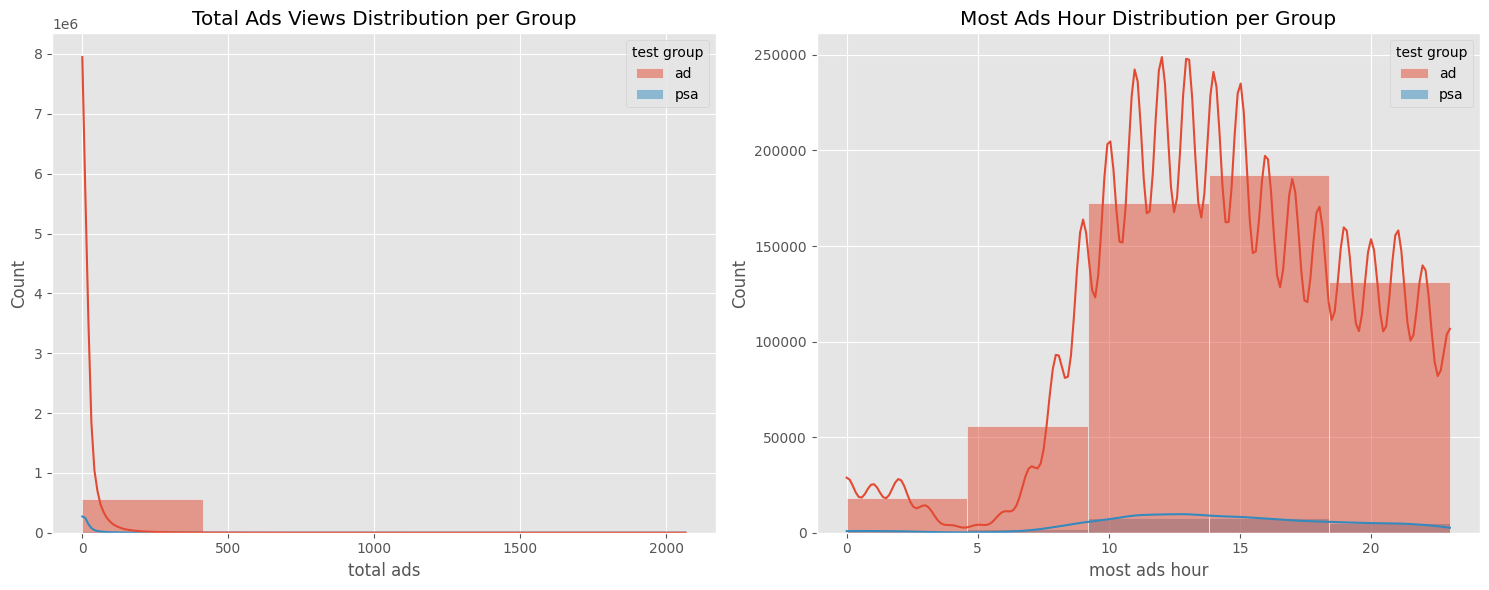

In [ ]:
# Create a figure and two subplots with a specific size

fig, ax = plt.subplots(1, 2, figsize = (15, 6))

# Create a histogram for the 'total ads' variable with hue based on 'test group'
# Use kernel density estimation (kde=True) for a smoother curve
# Set the number of bins to 5 and assign the plot to the first subplot (ax[0])
sns.histplot(data = df, x = 'total ads', kde = True, hue = 'test group', bins = 5, ax = ax[0])
ax[0].set_title('Total Ads Views Distribution per Group') # Set a title for the first subplot


# Create a histogram for the 'most ads hour' variable with hue based on 'test group'
# Use kernel density estimation (kde=True) for a smoother curve
# Set the number of bins to 5 and assign the plot to the second subplot (ax[1])
sns.histplot(data = df, x = 'most ads hour', kde = True, hue = 'test group', bins = 5, ax = ax[1])
ax[1].set_title('Most Ads Hour Distribution per Group') # Set a title for the second subplot

# Adjust spacing between subplots to prevent overlapping elements
plt.tight_layout()
plt.show()

#### **Summary of Findings:**

The plot presents two histograms:

1. **Total Ads Views Distribution per Group:** This histogram displays the distribution of the total number of ads viewed by users in each group ("ad" and "psa").

   - **Observations:**
      - The distribution appears to be right-skewed for both groups, with a long tail towards higher values. This indicates that a majority of users view a relatively small number of ads, while a smaller portion views a large number of ads.
      - The "ad" group seems to have a slightly higher proportion of users viewing a large number of ads compared to the "psa" group.

2. **Most Ads Hour Distribution per Group:** This histogram shows the distribution of the hour at which users viewed the most ads.

   - **Observations:**
      - The distribution appears to be multimodal for both groups, with multiple peaks suggesting that users tend to view the most ads at specific times of the day.
      - The peak for the "ad" group is slightly shifted to the right compared to the "psa" group, indicating that users in the "ad" group may be viewing more ads later in the day.

**Overall:**

The plot suggests that there are some differences in the ad viewing behavior between the "ad" and "psa" groups. Users in the "ad" group tend to view more ads overall and may have a slightly different pattern of ad viewing throughout the day compared to users in the "psa" group.


In [ ]:
# Loops through all numeric columns in the DataFrame.

for col in df.select_dtypes(include = np.number).columns:
    print(f"Fpr column: {col}\n") # Prints the name of the column being analyzed.
    print(f"Minimum Value is: {df[col].min()}")  # Prints the minimum value in the column.
    print(f"1st Quantile is: {df[col].quantile(0.01)}") # Prints the 1st quantile (1st percentile) value in the column.
    print(f"10th Quantile is: {df[col].quantile(0.10)}") # Prints the 10th quantile (10th percentile) value in the column.
    print(f"25th Quantile is: {df[col].quantile(0.25)}") # Prints the 25th quantile (first quartile) value in the column.
    print(f"50th Quantile is: {df[col].quantile(0.50)}") # Prints the 50th quantile (median) value in the column.
    print(f"75th Quantile is: {df[col].quantile(0.75)}") # Prints the 75th quantile (third quartile) value in the column.
    print(f"90th Quantile is: {df[col].quantile(0.90)}") # Prints the 90th quantile value in the column.
    print(f"95th Quantile is: {df[col].quantile(0.95)}") # Prints the 95th quantile value in the column.
    print(f"99th Quantile is: {df[col].quantile(0.99)}") # Prints the 99th quantile value in the column.
    print(f"99.5th Quantile is: {df[col].quantile(0.995)}") # Prints the 99.5th quantile value in the column.
    print(f"Maximum Value is: {df[col].max()}\n") # Prints the maximum value in the column and adds a blank line for readability.

Fpr column: total ads

Minimum Value is: 1
1st Quantile is: 1.0
10th Quantile is: 2.0
25th Quantile is: 4.0
50th Quantile is: 13.0
75th Quantile is: 27.0
90th Quantile is: 57.0
95th Quantile is: 88.0
99th Quantile is: 202.0
99.5th Quantile is: 276.0
Maximum Value is: 2065

Fpr column: most ads hour

Minimum Value is: 0
1st Quantile is: 1.0
10th Quantile is: 9.0
25th Quantile is: 11.0
50th Quantile is: 14.0
75th Quantile is: 18.0
90th Quantile is: 21.0
95th Quantile is: 22.0
99th Quantile is: 23.0
99.5th Quantile is: 23.0
Maximum Value is: 23



**From domain knowledge, the ```most ads hour``` column does not contain outliers as it ranges from 0 to 23 hours. However, in the ```total ads``` column, the 99.5th percentile value is 276, which seems plausible for a single day. In contrast, the maximum (100th percentile) value is 2065, which is highly illogical for the number of ads a person can view in a single day. Therefore, values exceeding the 99.5th percentile can be considered outliers.**

In [ ]:
before = df.shape[0] # Data shape before removing the outliers

In [ ]:
df = df[df['total ads'] <= 276] # Filters the DataFrame to remove rows where 'total ads' exceeds the 99.5th percentile
df.reset_index(drop = True, inplace = True) # Resets the index
after = df.shape[0] # Data shape before removing the outliers

In [ ]:
print(f"""Total data before removing the outliers is: {before} and after removing the outlier is {after}\n
Difference is {before - after} that means {np.round(((before - after)/before) * 100, 2)}% data has been removed""")

Total data before removing the outliers is: 588101 and after removing the outlier is 585173

Difference is 2928 that means 0.5% data has been removed


In [ ]:
# Repeats the quantile calculations for the filtered numeric columns.
for col in df.select_dtypes(include = np.number).columns:
    print(f"Fpr column: {col}\n")
    print(f"Minimum Value is: {df[col].min()}")
    print(f"1st Quantile is: {df[col].quantile(0.01)}")
    print(f"10th Quantile is: {df[col].quantile(0.10)}")
    print(f"25th Quantile is: {df[col].quantile(0.25)}")
    print(f"50th Quantile is: {df[col].quantile(0.50)}")
    print(f"75th Quantile is: {df[col].quantile(0.75)}")
    print(f"90th Quantile is: {df[col].quantile(0.90)}")
    print(f"95th Quantile is: {df[col].quantile(0.95)}")
    print(f"99th Quantile is: {df[col].quantile(0.99)}")
    print(f"99.5th Quantile is: {df[col].quantile(0.995)}")
    print(f"Maximum Value is: {df[col].max()}\n")

Fpr column: total ads

Minimum Value is: 1
1st Quantile is: 1.0
10th Quantile is: 2.0
25th Quantile is: 4.0
50th Quantile is: 13.0
75th Quantile is: 27.0
90th Quantile is: 55.0
95th Quantile is: 83.0
99th Quantile is: 166.0
99.5th Quantile is: 202.0
Maximum Value is: 276

Fpr column: most ads hour

Minimum Value is: 0
1st Quantile is: 1.0
10th Quantile is: 9.0
25th Quantile is: 11.0
50th Quantile is: 14.0
75th Quantile is: 18.0
90th Quantile is: 21.0
95th Quantile is: 22.0
99th Quantile is: 23.0
99.5th Quantile is: 23.0
Maximum Value is: 23



**Now data looks much better or realistic**

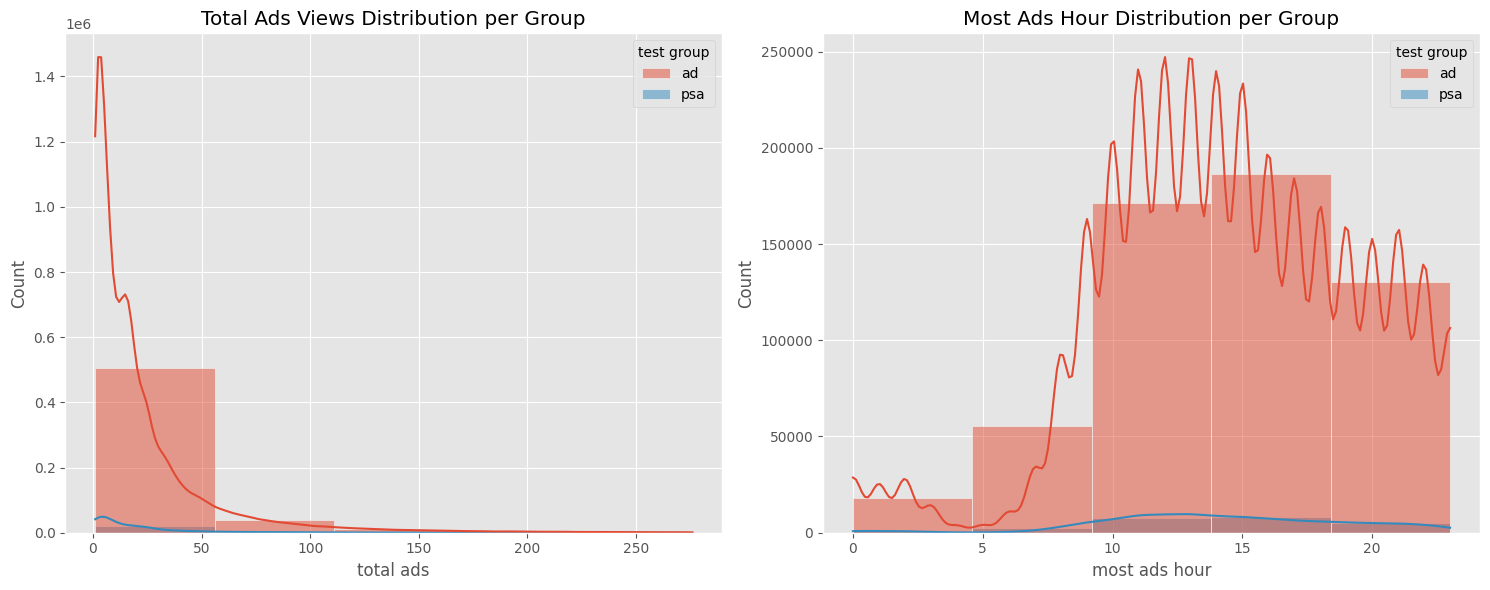

In [ ]:
# Plot the Histogram again

fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.histplot(data = df, x = 'total ads', kde = True, hue = 'test group', bins = 5, ax = ax[0])
ax[0].set_title('Total Ads Views Distribution per Group')

sns.histplot(data = df, x = 'most ads hour', kde = True, hue = 'test group', bins = 5, ax = ax[1])
ax[1].set_title('Most Ads Hour Distribution per Group')

plt.tight_layout()
plt.show()

1. The plot shows two histograms: one for the distribution of "Total Ads Views" and another for "Most Ads Hour."
2. Each histogram is divided by "test group," allowing us to compare "ad" and "psa" groups.
3. For "Total Ads Views," the distribution is skewed to the right for both groups, meaning most users view fewer ads, but some view many. The "ad" group might have more users viewing a large number of ads.
4. For "Most Ads Hour," the distribution has multiple peaks for both groups, suggesting users view most ads at specific times. The peak for the "ad" group seems slightly later than for the "psa" group.
5. To understand the differences better, we should calculate statistics, run tests, and explore other factors influencing ad viewing.

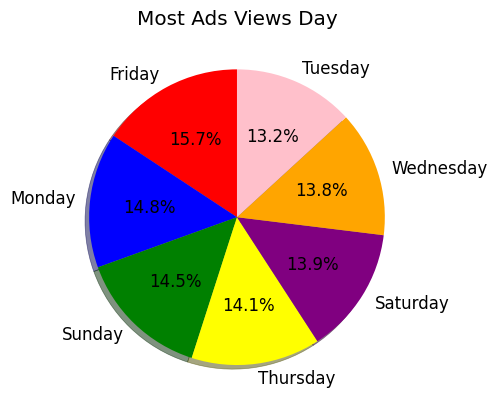

In [ ]:
# Set the title of the plot
plt.title('Most Ads Views Day')

# Define colors for the seven days of the week
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink']

# Create a pie chart
plt.pie(
    df['most ads day'].value_counts(normalize=True),  # Proportions of each day
    labels=df['most ads day'].value_counts().index,  # Labels for each day
    startangle=90,  # Start the pie chart from a 90-degree angle
    shadow=True,  # Add a shadow effect to the pie chart
    autopct=lambda p: '{:.1f}%'.format(p),  # Display percentage values on the chart
    colors=colors,  # Colors for each slice
    textprops={'color': 'black', 'fontsize': 12}  # White text for percentages
)

# Display the pie chart
plt.show()

#### **Inferences**

The pie chart shows the distribution of days when people view the most ads.

Here are the key takeaways:

* **Friday is the peak day for ad views:** With 15.7% of users viewing the most ads on Friday, it stands out as the day with the highest proportion.
* **Consistent distribution across other days:** The remaining days show a relatively even distribution, with percentages ranging from 13.2% (Tuesday) to 14.8% (Monday).
* **No significant outliers:** There are no days with significantly lower or higher ad views compared to the others.

This information could be useful for advertisers to plan their ad campaigns more effectively by targeting specific days with higher ad engagement.


# **A/B Test**

#### **Divide the Data into Control Group (Users who saw Ads) and Test Group (Users who saw PSA)**

In [ ]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,276,Friday,14
4,ad,False,264,Wednesday,13


In [ ]:
control_group = df[df['test group'] == 'ad']
test_group = df[df['test group'] == 'psa']

control_group.shape, test_group.shape

((561765, 5), (23408, 5))

## **Test for Conversion Rate**

### **Hypotheses Formulation:**

**Null Hypothesis (H₀):**  
The conversion rate of ads (control group) is less than or equal to that of PSAs (test group).

**Alternative Hypothesis (H₁):**  
The conversion rate of ads (control group) is greater than that of PSAs (test group).

In [ ]:
# Calculate the total number of users in the control and test groups
control_group_n, test_group_n = control_group.shape[0], test_group.shape[0]
control_group_n, test_group_n

(561765, 23408)

In [ ]:
control_group_converted = control_group[control_group['converted'] == True] # Filter the control group to get only the users who converted

test_group_converted = test_group[test_group['converted'] == True] # Filter the test group to get only the users who converted

# Count the number of converted users in the control group and the test group
control_group_converted_n, test_group_converted_n = control_group_converted.shape[0], test_group_converted.shape[0]

control_group_converted_n, test_group_converted_n

(13978, 405)

In [ ]:
control_group_CR = np.round((control_group_converted_n/control_group_n) * 100, 3) # Calculate the conversion rate for the control group and round to 3 decimal places
test_group_CR = np.round((test_group_converted_n/test_group_n) * 100, 3) # Calculate the conversion rate for the test group and round to 3 decimal places
difference = np.round(test_group_CR - control_group_CR, 3) # Calculate the difference in conversion rates between test and control groups

# Check if the test group conversion rate is higher than the control group
if difference > 0:
  print(f"""Conversion Rate in Control Group (User Saw Ads) is {control_group_CR}% and Conversion Rate in Test Group (User Saw Public Service Announcment) is {test_group_CR}%. The Conversion Rate in Test Group is {difference}% Higher Than the Control Group""")

elif difference < 0:
  print(f"""Conversion Rate in Control Group (User Saw Ads) is {control_group_CR}% and Conversion Rate in Test Group (User Saw Public Service Announcment) is {test_group_CR}%. The Conversion Rate in Test Group is {np.abs(difference)}% Lower Than the Control Group""")

else:
  print(f"""Conversion Rate in Control Group (User Saw Ads) is {control_group_CR}% and Conversion Rate in Test Group (User Saw Public Service Announcment) is {test_group_CR}%. The Conversion Rate in Test Group is Equal to the Control Group""")

Conversion Rate in Control Group (User Saw Ads) is 2.488% and Conversion Rate in Test Group (User Saw Public Service Announcment) is 1.73%. The Conversion Rate in Test Group is 0.758% Lower Than the Control Group


In [ ]:
def proportion_ztest(n_converted_control, n_converted_test, n_total_control, n_total_test, alpha = 0.05):
  """
  Performs a two-sample z-test for proportions to compare the conversion rates of two groups.

  Args:
    n_converted_control: Number of conversions in the control group.
    n_converted_test: Number of conversions in the test group.
    n_total_control: Total number of users in the control group.
    n_total_test: Total number of users in the test group.
    alpha: Significance level for the test (default: 0.05).

  Returns:
    None

  This function performs the following:

    1. Calculates the z-statistic and p-value using `statsmodels.stats.proportion.proportions_ztest`.
    2. Prints the calculated z-statistic and p-value.
    3. Interprets the results based on the p-value and the significance level:
      - If p-value < alpha: Rejects the null hypothesis and concludes that the conversion rate
        in the control group is significantly greater than the conversion rate in the test group.
      - If p-value >= alpha: Fails to reject the null hypothesis and concludes that the conversion rate
        in the test group is less than or equal to the conversion rate in the control group.

  Note: This function assumes that the samples are independent and that the sample sizes are sufficiently large
  to meet the assumptions of the z-test.
  """
  conversions = [n_converted_control, n_converted_test] # Number of conversions in each group
  sample_sizes = [n_total_control, n_total_test] # Total number of users in each group

  # Perform the Z-test
  z_stat, p_value = proportions_ztest(conversions, sample_sizes, alternative='larger')

  # Print test statistic and p-value
  print(f"Z-statistic: {z_stat}")
  print(f"P-value: {p_value}")

  # Interpret Results
  if p_value < alpha:
    print("Reject the null hypothesis (H0).")
    print("There is sufficient evidence to conclude that the conversion rate for the control group is significantly greater than the conversion rate for the test group.")
  else:
    print("Fail to reject the null hypothesis (H0).")
    print("There is not enough evidence to conclude that the conversion rate for the test group is significantly greater than the conversion rate for the control group.")

In [ ]:
proportion_ztest(n_converted_control = control_group_converted_n, n_converted_test = test_group_converted_n,
                 n_total_control = control_group_n, n_total_test = test_group_n)

Z-statistic: 7.339007616376538
P-value: 1.0759168427441878e-13
Reject the null hypothesis (H0).
There is sufficient evidence to conclude that the conversion rate for ads is greater than the conversion rate for PSA.


#### **Statistical Analysis**
- **Z-statistic**: The calculated Z-statistic is 7.339, which is significantly high. This indicates a strong deviation from the null hypothesis.
- **P-value**: The p-value is extremely small (\(1.076 \times 10^{-13}\)), well below the standard significance level (e.g., 0.05 or 0.01). This suggests that the observed difference in conversion rates is highly unlikely to have occurred by random chance.

#### **Conclusion**
- **Null Hypothesis (H₀)**: The null hypothesis states that the conversion rate for users who saw ads is equal to or less than the conversion rate for users who saw the public service announcement (PSA).
- **Result**: Since the p-value is much smaller than the significance threshold, we reject the null hypothesis. This provides strong evidence that the conversion rate for ads is **greater** than the conversion rate for PSAs.

#### **Practical Implication**
- The data indicates that the test group (PSA viewers) had a **conversion rate 0.758% lower** than the control group (ad viewers). This means the ads were more effective at converting users compared to the PSA.
- The difference in conversion rates, though statistically significant, is relatively small. Depending on the context, such as costs and campaign goals, this small difference might or might not justify continuing with ads over PSAs.

#### **Recommendations**
1. If the goal is purely to maximize conversions, continuing with the ad-based campaign is recommended.
2. However, if the PSA aligns better with broader organizational objectives (e.g., public awareness or corporate social responsibility), further analysis may be required to weight these benefits against the lower conversion rate.
3. Conduct a cost-benefit analysis to evaluate the financial implications of maintaining the ad campaign versus running PSAs.

## **Test for Total Ads Views**

**Null Hypothesis (H₀):**  
There is no difference in the average ad views between customers who saw ads and those who saw psa.

**Alternative Hypothesis (H₁):**  
There is a significant difference in the average ad views between customers who saw ads and those who saw psa.

In [ ]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,276,Friday,14
4,ad,False,264,Wednesday,13


In [ ]:
control_group.head(), test_group.head()

(  test group  converted  total ads most ads day  most ads hour
 0         ad      False        130       Monday             20
 1         ad      False         93      Tuesday             22
 2         ad      False         21      Tuesday             18
 3         ad      False        276       Friday             14
 4         ad      False        264    Wednesday             13,
     test group  converted  total ads most ads day  most ads hour
 16         psa      False        248     Saturday             19
 32         psa      False         27     Thursday              8
 60         psa      False         13      Tuesday             19
 124        psa      False         32    Wednesday             19
 137        psa      False        105      Tuesday             19)

In [ ]:
control_group_mean = np.round(control_group['total ads'].mean(), 3) # Calculate the mean of the 'total ads' column for the control group and round to 3 decimal places
test_group_mean = np.round(test_group['total ads'].mean(), 3) # Calculate the mean of the 'total ads' column for the test group and round to 3 decimal places
difference = np.round(test_group_mean - control_group_mean, 3) # Calculate the difference between the test group mean and the control group mean, rounded to 3 decimal places

# Check if the test group's ads view rate is higher than the control group's
if difference > 0:
  print(f"""Ads View Rate in Control Group (User Saw Ads) is {control_group_mean} and Ads View Rate in Test Group (User Saw Public Service Announcment) is {test_group_mean}. The Ads View Rate in Test Group is {difference} Higher Than the Control Group""")

elif difference < 0:
  print(f"""Ads View Rate in Control Group (User Saw Ads) is {control_group_mean} and Ads View Rate in Test Group (User Saw Public Service Announcment) is {test_group_mean}. The Ads View Rate in Test Group is {np.abs(difference)} Lower Than the Control Group""")

else:
  print(f"""Ads View Rate in Control Group (User Saw Ads) is {control_group_mean} and Ads View Rate in Test Group (User Saw Public Service Announcment) is {test_group_mean}. The Ads View Rate in Test Group is Equal to the Control Group""")

Ads View Rate in Control Group (User Saw Ads) is 22.849 and Ads View Rate in Test Group (User Saw Public Service Announcment) is 22.936. The Ads View Rate in Test Group is 0.087 Higher Than the Control Group


### **Check for Data Normality**

#### **Using Distribution Plot**

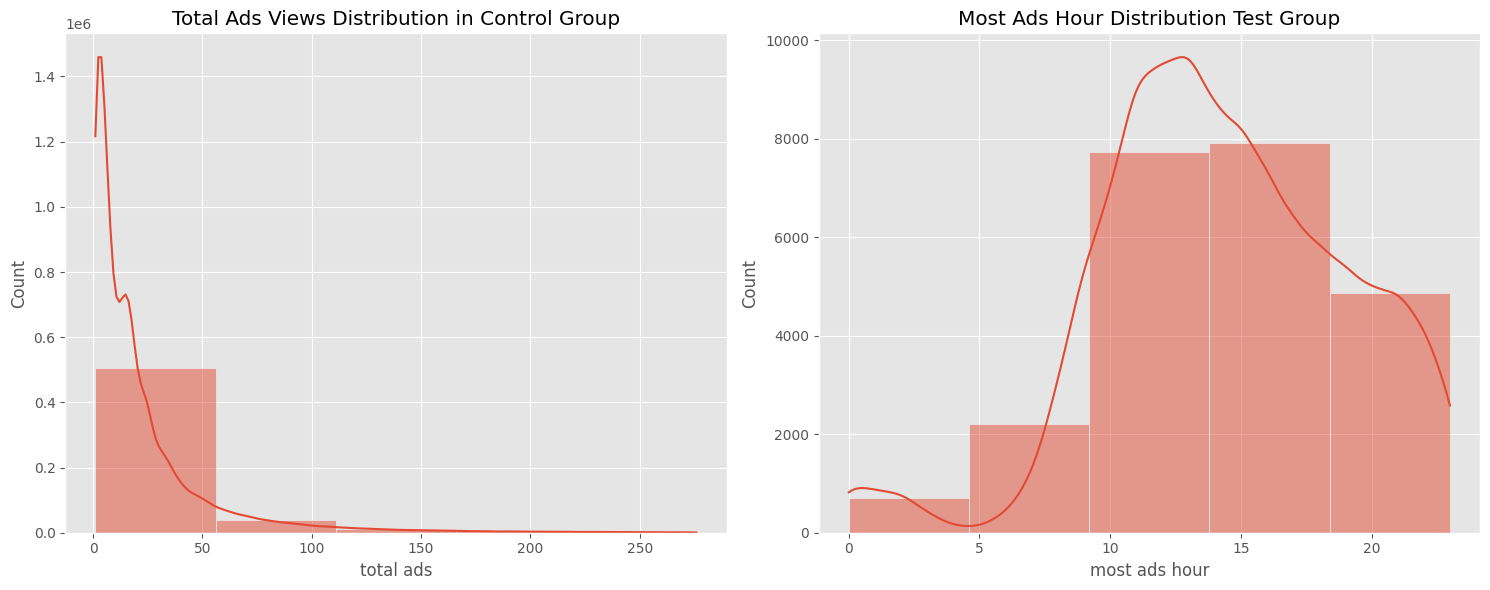

In [ ]:
# Plot Histogram for each group to see the distribution

fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.histplot(data = control_group, x = 'total ads', kde = True, bins = 5, ax = ax[0])
ax[0].set_title('Total Ads Views Distribution in Control Group')

sns.histplot(data = test_group, x = 'most ads hour', kde = True, bins = 5, ax = ax[1])
ax[1].set_title('Most Ads Hour Distribution Test Group')

plt.tight_layout()
plt.show()

#### **Summary of Findings:**

The plot presents two histograms:

1. **Total Ads Views Distribution in Control Group:** This histogram displays the distribution of the total number of ads viewed by users in the control group.

   - **Observations:**
      - The distribution appears to be right-skewed, with a long tail towards higher values. This indicates that a majority of users view a relatively small number of ads, while a smaller portion views a large number of ads.

2. **Most Ads Hour Distribution Test Group:** This histogram shows the distribution of the hour at which users in the test group viewed the most ads.

   - **Observations:**
      - The distribution appears to be multimodal, with multiple peaks suggesting that users tend to view the most ads at specific times of the day.

**Overall:**

The plot provides insights into the ad viewing behavior of users in the control group and the test group. The right-skewed distribution of "Total Ads Views" in the control group suggests that a majority of users in this group view a limited number of ads. The multimodal distribution of "Most Ads Hour" in the test group indicates that users in this group tend to have specific peak hours for ad viewing.

#### **Using Q-Q Plot**

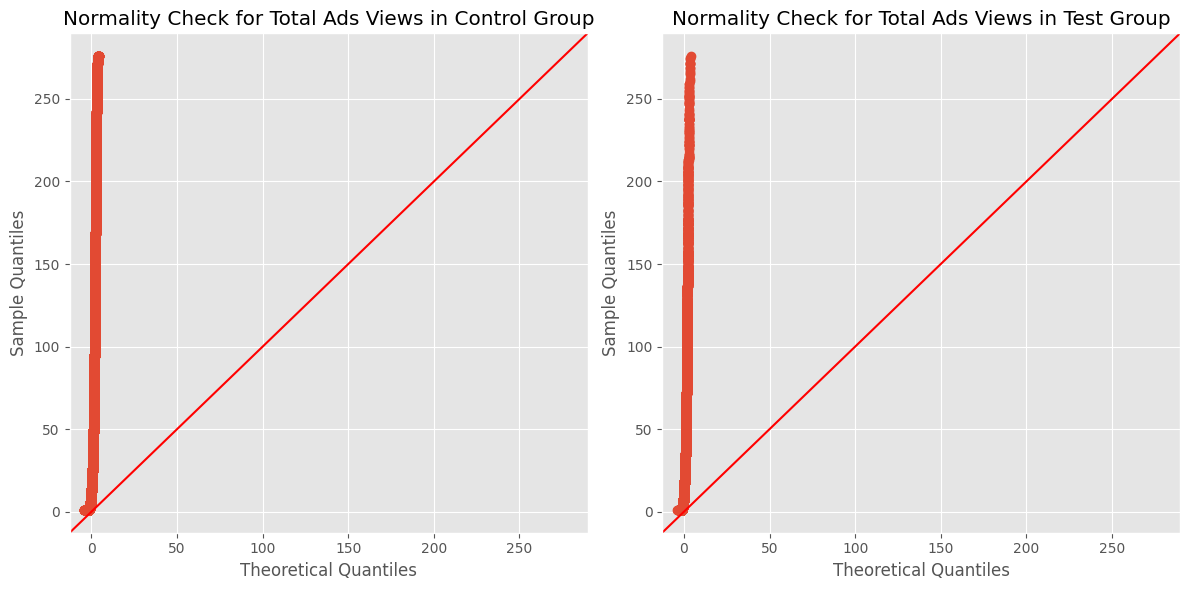

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns

# QQ plot for credit card payment method
sm.qqplot(control_group['total ads'], line='45', ax=axes[0])
axes[0].set_title('Normality Check for Total Ads Views in Control Group')

# QQ plot for PayPal payment method
sm.qqplot(test_group['total ads'], line='45', ax=axes[1])
axes[1].set_title('Normality Check for Total Ads Views in Test Group')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Certainly, let's analyze the findings from the provided QQ plot.

**Summary of Findings:**

The plot presents two Q-Q plots:

1. **Normality Check for Total Ads Views in Control Group:** This plot compares the quantiles of the "Total Ads Views" distribution in the control group to the quantiles of a theoretical normal distribution.

   - **Observations:**
      - The points in the plot deviate significantly from the diagonal line, especially in the tails.
      - This indicates that the distribution of "Total Ads Views" in the control group is not normally distributed.

2. **Normality Check for Total Ads Views in Test Group:** This plot compares the quantiles of the "Total Ads Views" distribution in the test group to the quantiles of a theoretical normal distribution.

   - **Observations:**
      - Similar to the control group, the points deviate significantly from the diagonal line, particularly in the tails.
      - This suggests that the distribution of "Total Ads Views" in the test group is also not normally distributed.

**Overall:**

The QQ plots demonstrate that the distribution of "Total Ads Views" in both the control group and the test group is not normally distributed. This information is crucial for selecting appropriate statistical tests. If the normality assumption is violated, parametric tests like t-tests may not be suitable, and non-parametric alternatives should be considered.

#### **Using Statistical Method**

**Null and Alternative Hypotheses**:

1. **Null Hypothesis (H₀)**:  
   Data follow Normal Distribution.

2. **Alternative Hypothesis (H₁)**:  
   Data does not follow Normal Distribution

In [ ]:
def normality_check(data1, data2, alpha=0.05, group1='', group2=''):
  """
  Performs Shapiro-Wilk normality tests on two datasets and provides recommendations for subsequent statistical tests.

  Args:
    data1: The first dataset to be tested for normality.
    data2: The second dataset to be tested for normality.
    alpha: The significance level for the normality tests (default: 0.05).
    group1: A string representing the label for the first dataset (optional).
    group2: A string representing the label for the second dataset (optional).

  Returns:
    None. Prints test results and recommendations to the console.

  This function conducts Shapiro-Wilk tests on both input datasets to assess their normality.
  Based on the p-values from the tests, it provides recommendations for appropriate statistical tests:

  - If both datasets are not normally distributed, it suggests using the Mann-Whitney U-test.
  - If both datasets are normally distributed, it suggests proceeding to the Levene test to check for homogeneity of variances.
  - If only one dataset is normally distributed, it recommends using a non-parametric test like the Mann-Whitney U-test.

  **Note:** This function assumes that the input datasets are independent samples.
  """
  stat1, p1 = stats.shapiro(data1)
  stat2, p2 = stats.shapiro(data2)

  # Print test results
  print(f"For {group1}\nTest Statistic: {stat1} and P-Value: {p1}\n")
  print(f"For {group2}\nTest Statistic: {stat2} and P-Value: {p2}\n")

  # Evaluate normality conditions
  if p1 < alpha and p2 < alpha:
    print(f"Both {group1} and {group2} have P < {alpha}. Data in both groups are not normally distributed. Go to Mann-Whitney U-Test.")
  elif p1 > alpha and p2 > alpha:
    print(f"Both {group1} and {group2} have P > {alpha}. Data in both groups are normally distributed. Go to Levene Test to test the homogeneity of variances.")
  elif p1 < alpha and p2 > alpha:
    print(f"{group1} has P < {alpha} (not normally distributed), but {group2} has P > {alpha} (normally distributed). Go to a non-parametric test like Mann-Whitney U-Test.")
  elif p1 > alpha and p2 < alpha:
    print(f"{group1} has P > {alpha} (normally distributed), but {group2} has P < {alpha} (not normally distributed). Go to a non-parametric test like Mann-Whitney U-Test.")
  else:
    print("Unexpected behavior. Check your data and input values.")

In [ ]:
normality_check(data1 = control_group['total ads'],
                data2 = test_group['total ads'],
                alpha=0.05, group1='Total Ads Views in Control Group', group2='Total Ads Views in Test Group')

For Total Ads Views in Control Group
Test Statistic: 0.6460636361717921 and P-Value: 8.537369801949885e-189

For Total Ads Views in Test Group
Test Statistic: 0.6365618960680122 and P-Value: 6.104176288051015e-112

Both Total Ads Views in Control Group and Total Ads Views in Test Group have P < 0.05. Data in both groups are not normally distributed. Go to Mann-Whitney U-Test.


### **Non-Parametric Test**

In [ ]:
def mann_whitley_U(group1, group2, alpha = 0.05):
  """
  Performs the Mann-Whitney U test to compare the distributions of two independent samples.

  Args:
    group1: The first group of data points.
    group2: The second group of data points.
    alpha: The significance level for the test (default: 0.05).

  Returns:
    None. Prints the test statistic, p-value, and a conclusion about the null hypothesis.

  This function conducts the Mann-Whitney U test, a non-parametric test used to compare the distributions
  of two independent groups when the assumption of normality is violated.

  The test assesses whether the two groups are likely to have been drawn from the same population.

  **Note:** This function assumes that the input datasets are independent samples.
  """
  stat, p = stats.mannwhitneyu(group1, group2)

  print(f"Test Statistics: {stat} and P-Value: {p}\n")

  if p < alpha:
    print(f"Given that P < {alpha}, we reject the null hypothesis. There is a significant difference in the distributions of the two groups.")
  else:
    print(f"Given that P > {alpha}, we fail to reject the null hypothesis. There is no significant difference in the distributions of the two groups.")

In [ ]:
mann_whitley_U(group1 = control_group['total ads'], group2 = test_group['total ads'])

Test Statistics: 6742292304.5 and P-Value: 3.6798633952250706e-11

Given that P < 0.05, we reject the null hypothesis. There is a significant difference in the distributions of the two groups.


#### **Statistical Analysis Inference:**

1. **Mann-Whitney U Test**:
   - **Test Statistic**: The test statistic is \(6742292304.5\), which quantifies the rank-based differences between the distributions of the two groups.
   - **P-value**: The p-value (\(3.68 \times 10^{-11}\)) is far below the standard significance threshold (\(p < 0.05\)). This indicates that the observed difference in distributions is statistically significant.

2. **Null Hypothesis (\(H_0\))**:
   - The null hypothesis assumes that there is no difference in the distributions of the ads view rates between the control group (ads viewers) and the test group (PSA viewers).
   - **Result**: Since the p-value is much smaller than 0.05, we reject the null hypothesis. This provides strong evidence that the distributions of ads view rates differ between the two groups.

3. **Practical Difference**:
   - The test group's ads view rate is **0.087 higher** than the control group’s ads view rate. This indicates that users in the test group (PSA viewers) viewed slightly more ads on average compared to those in the control group.


#### **Practical Implications:**

1. **Significant Difference**:
   - Even though the test group has a slightly higher ads view rate (\(+0.087\)), the difference is statistically significant due to the large sample size.

2. **Further Investigation**:
   - Explore why PSA viewers are seeing more ads on average. This could involve:
     - Analyzing user behavior patterns.
     - Investigating the structure of the ad delivery mechanism during the experiment.

3. **Campaign Strategy**:
   - If the primary objective is to maximize ad impressions, the PSA approach could be considered effective despite its slightly lower conversion rate.
   - Conduct a cost-benefit analysis to determine if the increase in ads viewed justifies changes to the campaign strategy.

4. **Balance with Conversion Rates**:
   - While the ads view rate is higher in the test group, the conversion rate for PSAs was previously noted to be lower than for ads. Carefully weigh both metrics when making a strategic decision.


#### **Recommendation:**
If maximizing user engagement with ads (ads view rate) is a priority, the PSA approach might offer some advantages. However, if the end goal is to drive conversions, the ad-based approach remains more effective.

### **Summary of Hypothesis Testing Results:**

1. **Conversion Rate Analysis (Z-Test)**:
   - **Statistical Outcome**: The Z-test shows a significant difference in conversion rates, with the p-value (\(1.076 \times 10^{-13}\)) well below the threshold (\(p < 0.05\)).
   - **Key Finding**: The conversion rate for the control group (ads viewers) is **0.758% higher** than that of the test group (PSA viewers).
   - **Implication**: Ads are more effective at driving conversions compared to PSAs, but the observed difference is relatively small.

2. **Ads View Rate Analysis (Mann-Whitney U Test)**:
   - **Statistical Outcome**: The Mann-Whitney U test indicates a significant difference in ads view rates, with a p-value (\(3.68 \times 10^{-11}\)) far below \(p < 0.05\).
   - **Key Finding**: The test group (PSA viewers) has an **ads view rate 0.087 higher** than the control group (ads viewers).
   - **Implication**: PSA viewers engage slightly more with ads compared to the control group.


#### **Combined Insights:**
- **Trade-off Between Metrics**:
  - The control group excels in conversion rates, making ads a better choice for driving immediate sales or sign-ups.
  - The test group demonstrates slightly higher engagement with ads (ads view rate), suggesting PSAs might encourage broader user interaction.
- **Statistical Significance**:
  - Both differences (conversion rates and ads view rates) are statistically significant, underscoring that these findings are unlikely to be due to random chance.


#### **Recommendations:**
1. **If Conversions Are the Goal**:
   - Stick with the ad-based campaign, as it performs better in driving user actions that result in conversions.
2. **If Engagement Matters**:
   - Consider the PSA approach, especially if the campaign goal is to increase awareness or promote social responsibility while maintaining high engagement.
3. **Conduct a Cost-Benefit Analysis**:
   - Weigh the financial and strategic implications of prioritizing conversions versus user engagement.
4. **Future Research**:
   - Investigate the factors contributing to the higher ads view rate for PSAs to potentially enhance ad performance in the control group.

This dual analysis highlights the importance of aligning campaign strategies with specific business objectives.

# Regression Analysis

### **Regression Analysis Questions**
As Total Ads seen has been increased for the test group (psa) so -
-  What are the key factors that influence the total number of ads seen by a user?

-  Does the day or hour with the highest number of ads seen significantly impact the total ads seen by a user?

-  Is there a measurable difference in the total number of ads seen between users who converted versus those who did not?

-  Can a predictive model be built to estimate the total number of ads a user might see based on their viewing patterns, day, and conversion status?

In [ ]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,276,Friday,14
4,ad,False,264,Wednesday,13


In [ ]:
def regression_analysis(columns, target, test_size):
  """
  Performs linear regression analysis on a given DataFrame.

  Args:
    columns: A list of column names to use as independent variables.
    target: The name of the target variable.
    test_size: The proportion of the data to use for testing.

  Returns:
    A tuple containing:
      - X: The DataFrame of independent variables after one-hot encoding.
      - X_train: The training set of independent variables.
      - X_test: The test set of independent variables.
      - y_train: The training set of the target variable.
      - y_test: The test set of the target variable.

  This function performs the following steps:

    1. Extracts the independent variables (X) and the target variable (y) from the DataFrame.
    2. Performs one-hot encoding on the independent variables using `pd.get_dummies`.
    3. Splits the data into training and testing sets using `train_test_split`.
    4. Fits an Ordinary Least Squares (OLS) regression model using `statsmodels.OLS`.
    5. Prints the regression summary.
    6. Predicts the target variable for the test set.
    7. Calculates and prints the Mean Squared Error (MSE) and R-squared.

  """
  X = df[columns]
  y = df[target]

  X = pd.get_dummies(X, drop_first=True).astype(int)
  print("Independent data:\n", X.head())
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  print("\nTrain set size:", X_train.shape[0])
  print("Test set size:", X_test.shape[0])

  X_train_const = sm.add_constant(X_train)

  model = sm.OLS(y_train, X_train_const).fit()

  print(f"\nRegression analysis with the columns: {columns}\n\n{model.summary()}\n")

  # Add a constant to the test set
  X_test_const = sm.add_constant(X_test)

  # Predict the values of `total ads` for the test data
  y_pred = model.predict(X_test_const)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print("\nMean Squared Error (MSE):", mse)
  print("\nR-squared:", r2)

  return X, X_train, X_test, y_train, y_test

### **Analysis with a Single Variable ```most ads hour```**


In [ ]:
X_single, X_train_single, X_test_single, y_train_single, y_test_single = regression_analysis(columns = ['most ads hour'], target = 'total ads',
                                                                                             test_size = 0.10)

Independent data:
    most ads hour
0             20
1             22
2             18
3             14
4             13

Train set size: 526655
Test set size: 58518

Regression analysis with the columns: ['most ads hour']

                            OLS Regression Results                            
Dep. Variable:              total ads   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.44
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           8.53e-05
Time:                        07:49:59   Log-Likelihood:            -2.5676e+06
No. Observations:              526655   AIC:                         5.135e+06
Df Residuals:                  526653   BIC:                         5.135e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                            

#### **Key Inferences with One Predictor:**

1. **Weak Relationship:**
   - The R-squared value is extremely low (0.0001). This indicates that the model explains only a tiny fraction of the variance in the dependent variable ("total ads") using the independent variable ("most ads hour").
   - In other words, "most ads hour" has a very weak predictive power for "total ads."

2. **Statistically Significant Coefficient:**
   - The coefficient for "most ads hour" is -0.0355, and its p-value is statistically significant (p < 0.001). This suggests that there is a statistically significant negative relationship between "most ads hour" and "total ads."
   - However, given the very low R-squared, the practical significance of this relationship is likely minimal.

3. **Other Observations:**
   - The intercept (const) is 23.3560.
   - The standard errors for both the intercept and "most ads hour" are relatively small.
   - The Durbin-Watson statistic is close to 2, suggesting little to no autocorrelation in the residuals.
   - The Jarque-Bera test indicates that the residuals are not normally distributed.

**Overall:**

The regression analysis reveals a statistically significant but practically insignificant negative relationship between "most ads hour" and "total ads." The model's ability to predict "total ads" based on "most ads hour" is very limited.

### **Analysis with Two Variable ```most ads hour``` and ```most ads day```**

In [ ]:
X_double, X_train_double, X_test_double, y_train_double, y_test_double = regression_analysis(columns = ['most ads hour', 'most ads day'],
                                                                                             target = 'total ads', test_size = 0.10)

Independent data:
    most ads hour  most ads day_Monday  most ads day_Saturday  \
0             20                    1                      0   
1             22                    0                      0   
2             18                    0                      0   
3             14                    0                      0   
4             13                    0                      0   

   most ads day_Sunday  most ads day_Thursday  most ads day_Tuesday  \
0                    0                      0                     0   
1                    0                      0                     1   
2                    0                      0                     1   
3                    0                      0                     0   
4                    0                      0                     0   

   most ads day_Wednesday  
0                       0  
1                       0  
2                       0  
3                       0  
4                       1  



#### **Key Inferences with Two Predictors:**

1. **Improved Model Fit:** Compared to the previous model with only "most ads hour", this model including "most ads day" shows a slight improvement in fit. The R-squared value has increased from 0.0001 to 0.001, indicating that the model now explains a slightly larger proportion of the variance in "total ads". However, the overall fit remains relatively weak.

2. **Statistically Significant Coefficients:**
   - Both "most ads hour" and the dummy variables for "most ads day" (Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday) are statistically significant (p-values < 0.05). This suggests that both the hour of the day and the day of the week when the most ads were viewed are associated with the total number of ads viewed.

3. **Interpretation of Coefficients:**
   - The negative coefficient for "most ads hour" (-0.0392) indicates that, on average, for each additional hour later in the day when the most ads were viewed, the total number of ads viewed tends to decrease slightly.
   - The negative coefficients for the "most ads day" dummy variables suggest that, compared to the reference category (which is likely "Friday" based on the previous pie chart analysis), users tend to view fewer total ads when their "most ads day" falls on these specific days.

4. **Other Observations:**
   - The intercept (const) is 24.4395.
   - The standard errors for all coefficients are relatively small.
   - The Durbin-Watson statistic is close to 2, suggesting little to no autocorrelation in the residuals.
   - The Jarque-Bera test indicates that the residuals are not normally distributed.

**Overall:**

The regression analysis suggests that both the "most ads hour" and the "most ads day" are statistically significant predictors of "total ads," although the overall model fit remains weak. Further analysis is needed to explore other potential predictors and improve model performance.

### **Analysis with All Variables ```most ads hour```, ```most ads day``` and ```converted```**

The ```test group``` cannot be a valid predictor as it is created for A/B testing specificly.

In [ ]:
X_all, X_train_all, X_test_all, y_train_all, y_test_all = regression_analysis(columns = ['most ads hour', 'most ads day', 'converted'],
                                                                              target = 'total ads', test_size = 0.10)

Independent data:
    most ads hour  converted  most ads day_Monday  most ads day_Saturday  \
0             20          0                    1                      0   
1             22          0                    0                      0   
2             18          0                    0                      0   
3             14          0                    0                      0   
4             13          0                    0                      0   

   most ads day_Sunday  most ads day_Thursday  most ads day_Tuesday  \
0                    0                      0                     0   
1                    0                      0                     1   
2                    0                      0                     1   
3                    0                      0                     0   
4                    0                      0                     0   

   most ads day_Wednesday  
0                       0  
1                       0  
2                  

#### **Key Inferences with All Predictors:**

1. **Improved Model Fit:** Compared to the previous models, this model including "converted" as an additional predictor shows a substantial improvement in fit. The R-squared value has increased to 0.0642, indicating that the model now explains a larger proportion of the variance in "total ads."

2. **Statistically Significant Coefficients:**
    - "most ads hour", "most ads day" dummy variables (Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday), and "converted" are all statistically significant (p-values < 0.05). This suggests that all these variables are associated with the total number of ads viewed.

3. **Interpretation of Coefficients:**
    - The negative coefficient for "most ads hour" (-0.1201) indicates that, on average, for each additional hour later in the day when the most ads were viewed, the total number of ads viewed tends to decrease.
    - The negative coefficients for the "most ads day" dummy variables suggest that, compared to the reference category (likely "Friday"), users tend to view fewer total ads when their "most ads day" falls on these specific days.
    - The positive and highly significant coefficient for "converted" (51.2201) suggests that users who have converted (likely to a specific action, such as making a purchase) tend to view a substantially higher number of ads compared to those who have not converted.

4. **Other Observations:**
    - The intercept (const) is 23.8457.
    - The standard errors for all coefficients are relatively small.
    - The Durbin-Watson statistic is close to 2, suggesting little to no autocorrelation in the residuals.
    - The Jarque-Bera test indicates that the residuals are not normally distributed.

**Overall:**

The regression analysis suggests that the "most ads hour", "most ads day", and "converted" are all statistically significant predictors of "total ads." The inclusion of the "converted" variable significantly improves the model's fit, indicating that conversion status has a strong influence on the total number of ads viewed.

### **Analysis with All Variables + ```test group```**

To see about the evidence of the A/B testing result

In [ ]:
df['test group'] = df['test group'].map({'ad': 0, 'psa': 1})

X_group, X_train_group, X_test_group, y_train_group, y_test_group = regression_analysis(columns = ['test group', 'most ads hour', 'most ads day', 'converted'],
                                                                                        target = 'total ads', test_size = 0.10)

Independent data:
    test group  most ads hour  converted  most ads day_Monday  \
0           0             20          0                    1   
1           0             22          0                    0   
2           0             18          0                    0   
3           0             14          0                    0   
4           0             13          0                    0   

   most ads day_Saturday  most ads day_Sunday  most ads day_Thursday  \
0                      0                    0                      0   
1                      0                    0                      0   
2                      0                    0                      0   
3                      0                    0                      0   
4                      0                    0                      0   

   most ads day_Tuesday  most ads day_Wednesday  
0                     0                       0  
1                     1                       0  
2            

#### **Key Inferences with All Predictors + test group:**

1. **Improved Model Fit:** Compared to the previous models, this model including "test group" as an additional predictor shows a slight improvement in fit. The R-squared value has increased from 0.0642 to 0.0643, indicating that the model now explains a slightly larger proportion of the variance in "total ads."

2. **Statistically Significant Coefficients:**
    - "most ads hour", "most ads day" dummy variables (Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday), "converted", and "test group" are all statistically significant (p-values < 0.05). This suggests that all these variables are associated with the total number of ads viewed.

3. **Interpretation of Coefficients:**
    - The negative coefficient for "most ads hour" (-0.0729) indicates that, on average, for each additional hour later in the day when the most ads were viewed, the total number of ads viewed tends to decrease.
    - The negative coefficients for the "most ads day" dummy variables suggest that, compared to the reference category (likely "Friday"), users tend to view fewer total ads when their "most ads day" falls on these specific days.
    - The positive and highly significant coefficient for "converted" (51.2261) suggests that users who have converted (likely to a specific action, such as making a purchase) tend to view a substantially higher number of ads compared to those who have not converted.
    - The positive coefficient for "test group" (0.4894) indicates that, on average, users in the test group tend to view slightly more ads compared to the control group, after controlling for other factors in the model.

4. **Other Observations:**
    - The intercept (const) is 23.8235.
    - The standard errors for all coefficients are relatively small.
    - The Durbin-Watson statistic is close to 2, suggesting little to no autocorrelation in the residuals.
    - The Jarque-Bera test indicates that the residuals are not normally distributed.

**Overall:**

The regression analysis suggests that "most ads hour", "most ads day", "converted", and "test group" are all statistically significant predictors of "total ads." The inclusion of the "test group" variable provides some evidence of a slight difference in ad viewing behavior between the test and control groups, although the effect size is relatively small.

### **Summary of Regression Analysis Results**

1. **Model Fit**:
   - Across the regression models, the overall fit improves with the addition of more predictors, as evidenced by increasing R-squared values:
     - **Model 1 (Single Predictor)**: \( R^2 = 0.0001 \), indicating almost no explanatory power.
     - **Model 2 (Two Predictors)**: \( R^2 = 0.001 \), showing a slight improvement.
     - **Model 3 (Three Predictors)**: \( R^2 = 0.0642 \), reflecting a meaningful increase in variance explained.
     - **Model 4 (Four Predictors)**: \( R^2 = 0.0643 \), showing a marginal improvement with the addition of the test group.

2. **Key Predictors**:
   - **Most Ads Hour**:
     - A statistically significant but small negative relationship with "total ads" in all models. Later hours are associated with slightly fewer ads viewed.
   - **Most Ads Day**:
     - Statistically significant differences in ads viewed across days of the week. Compared to Friday (reference category), users tend to view fewer ads on other days.
   - **Converted**:
     - A strong positive predictor in Models 3 and 4. Users who convert tend to view significantly more ads (\(+51.2\)) compared to non-converters, contributing substantially to the model's explanatory power.
   - **Test Group**:
     - In Model 4, the test group is a statistically significant predictor. Users in the test group viewed slightly more ads (\(+0.49\)) than those in the control group, though the effect size is small.

3. **Other Observations**:
   - The intercept across models remains relatively stable, around 23.8–24.4, indicating the baseline number of ads viewed when all predictors are zero.
   - Residuals are not normally distributed in all models, as indicated by the Jarque-Bera test, suggesting potential model assumptions are not fully met.
   - The Durbin-Watson statistic (~2) suggests no significant autocorrelation in residuals.

4. **Practical Implications**:
   - The variable "converted" is the most impactful predictor, significantly influencing the total ads viewed.
   - "Most ads hour" and "most ads day" provide statistically significant but minor contributions.
   - The test group effect is small, indicating minimal practical difference in ad viewing behavior between test and control groups after accounting for other factors.

#### **Conclusion:**
The regression analyses reveal that while several variables are statistically significant predictors of "total ads," the overall predictive power of the models remains weak to moderate. The key driver of ads viewed is user conversion status, with other variables having smaller practical significance. Further refinement and exploration of additional predictors may be needed to enhance model performance.

## **Linear Regression Model**

**Optional:** To see that whether it is possible to make any predictions or not...

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all # Using all the predictors except the test group

(        most ads hour  converted  most ads day_Monday  most ads day_Saturday  \
 394889             22          0                    0                      0   
 201539             10          0                    0                      0   
 545603             23          0                    1                      0   
 482750             14          0                    0                      0   
 145022             12          0                    0                      0   
 ...               ...        ...                  ...                    ...   
 110268             13          0                    0                      0   
 259178              8          0                    0                      0   
 365838             23          0                    0                      0   
 131932             11          0                    0                      0   
 121958             19          0                    0                      0   
 
         most ads day_Sund

In [ ]:
# Define the column(s) that need to be scaled
cols_to_scale = ['most ads hour']

# Initialize the MinMaxScaler for feature scaling
scaler = MinMaxScaler()

# Scale the training dataset for the specified column(s) using MinMaxScaler
X_train_all[cols_to_scale] = scaler.fit_transform(X_train_all[cols_to_scale])

# Scale the test dataset using the parameters learned from the training dataset
X_test_all[cols_to_scale] = scaler.transform(X_test_all[cols_to_scale])

X_train_all, X_test_all

(        most ads hour  converted  most ads day_Monday  most ads day_Saturday  \
 394889       0.956522          0                    0                      0   
 201539       0.434783          0                    0                      0   
 545603       1.000000          0                    1                      0   
 482750       0.608696          0                    0                      0   
 145022       0.521739          0                    0                      0   
 ...               ...        ...                  ...                    ...   
 110268       0.565217          0                    0                      0   
 259178       0.347826          0                    0                      0   
 365838       1.000000          0                    0                      0   
 131932       0.478261          0                    0                      0   
 121958       0.826087          0                    0                      0   
 
         most ads day_Sund

In [ ]:
# Check the types of the datasets conversion
type(X_train_all), type(X_test_all), type(y_train_all), type(y_test_all)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [ ]:
# Convert the training and test datasets (features and target) to numpy arrays
X_train_all, X_test_all, y_train_all, y_test_all = X_train_all.values, X_test_all.values, y_train_all.values, y_test_all.values

type(X_train_all), type(X_test_all), type(y_train_all), type(y_test_all)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
# Create a simple sequential neural network model
model = tf.keras.models.Sequential([
    # Add a Dense layer with 1 neuron and no activation function for regression
    tf.keras.layers.Dense(1, input_shape=(X_train_all.shape[1],), activation=None)
])

# Compile the model with Adam optimizer, Mean Squared Error loss, and Mean Absolute Error as a metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',  # Mean Squared Error for regression problems
    metrics=['mae']  # Mean Absolute Error for evaluation
)

# Train the model on the training dataset and validate it on the test dataset
history = model.fit(
    X_train_all, y_train_all,
    epochs=100, # Train for 100 epochs
    batch_size=32, # Use a batch size of 32
    validation_data=(X_test_all, y_test_all), # Provide validation data
    verbose=1  # Display progress
)

Epoch 1/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 1032.3446 - mae: 19.2155 - val_loss: 966.8604 - val_mae: 19.1362
Epoch 2/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 945.4079 - mae: 19.1394 - val_loss: 963.5436 - val_mae: 19.1600
Epoch 3/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 941.4813 - mae: 19.1098 - val_loss: 963.1284 - val_mae: 19.3552
Epoch 4/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 944.2126 - mae: 19.1666 - val_loss: 963.0706 - val_mae: 19.1984
Epoch 5/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 937.4432 - mae: 19.1201 - val_loss: 962.9973 - val_mae: 19.2110
Epoch 6/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 938.9449 - mae: 19.1570 - val_loss: 963.1523 - val_mae: 19.3650
Epoch 7/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 948.4999 - mae: 19.2202 - val_loss: 963.0865 - val_mae: 19.2103
Epoch 8/100
16458/16458 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 945.9927 - mae: 19.2081

In [ ]:
# Get the weights and bias
weights, bias = model.layers[0].get_weights()

# Print the coefficients for each independent variable
print("Coefficients for Independent Variables:")
for feature, coef in zip(X_all.columns, weights.flatten()):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept (Bias): {bias[0]:.4f}")

Coefficients for Independent Variables:
most ads hour: -1.7285
converted: 51.3690
most ads day_Monday: -1.6107
most ads day_Saturday: -0.3947
most ads day_Sunday: -0.8141
most ads day_Thursday: -2.7815
most ads day_Tuesday: -2.2405
most ads day_Wednesday: -1.6491
Intercept (Bias): 23.7978


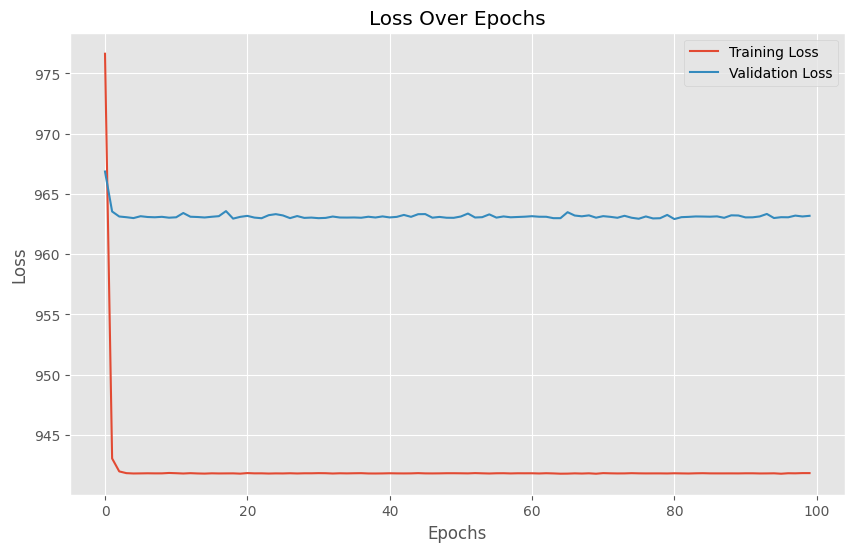

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **Model Coefficients:**
1. **Independent Variables**:
   - `most ads hour`: -1.7285
   - `converted`: 51.3690
   - `most ads day` (Categorical Variables, encoded as dummies):
     - Monday: -1.6107
     - Saturday: -0.3947
     - Sunday: -0.8141
     - Thursday: -2.7815
     - Tuesday: -2.2405
     - Wednesday: -1.6491

2. **Intercept (Bias)**: 23.7978

#### **Inference:**
1. **Significance of `converted`**:
   - The variable `converted` has the largest positive coefficient (51.3690). This suggests that if the `converted` variable is set to 1, it significantly increases the predicted output. It is the most influential variable in the model.

2. **Impact of `most ads hour`**:
   - The negative coefficient (-1.7285) indicates that higher values for the number of ads shown in a specific hour reduce the predicted value slightly. This means more ads shown in a given hour may negatively impact the target variable.

3. **Day of the Week Influence**:
   - Each dummy variable representing the day of the week has a negative coefficient, meaning all other days (compared to the reference category, likely Friday) have a negative impact on the predicted output.
   - Thursday (-2.7815) and Tuesday (-2.2405) have the most negative impact, suggesting they are the least effective days for whatever is being predicted.
   - Saturday (-0.3947) and Sunday (-0.8141) have the least negative impact, which might mean these days perform relatively better than other weekdays.

4. **Intercept (Bias)**:
   - The intercept (23.7978) is the baseline value when all other variables are zero. It provides the starting point for predictions when no specific factors (e.g., ads or days) are contributing.

#### **General Interpretation:**
- **Converted** is the key factor that drives up the predicted value.
- Fewer ads shown during a specific hour and avoiding ad focus on days like Thursday and Tuesday could potentially yield better outcomes based on the model.
- Days like Saturday and Sunday are more effective than weekdays, apart from Friday (if it’s the reference category).
  
If this is predicting something like ad conversions or engagement, optimizing for `converted` and targeting specific hours/days could be beneficial.

1829/1829 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


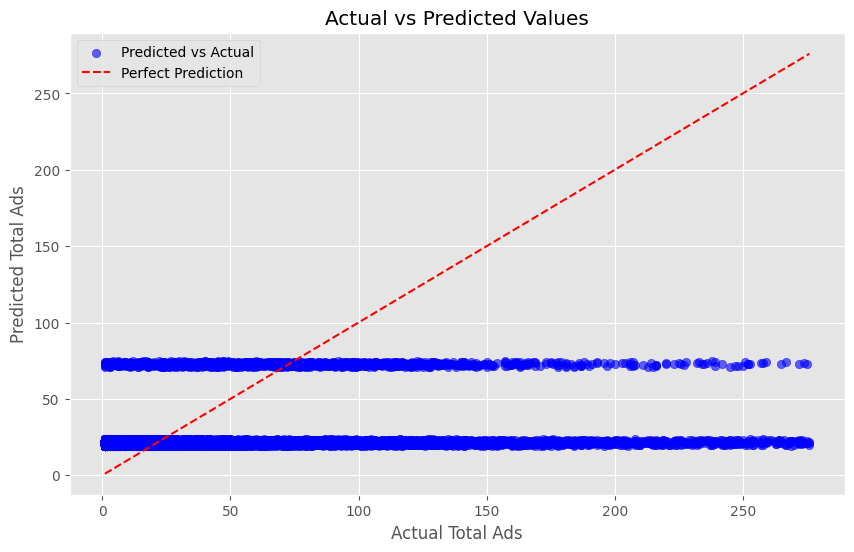

In [ ]:
# Make predictions
y_pred = model.predict(X_test_all).flatten()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test_all.min(), y_test_all.max()],
         [y_test_all.min(), y_test_all.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Total Ads')
plt.ylabel('Predicted Total Ads')
plt.legend()
plt.show()

In [ ]:
r2_score(y_test_all, y_pred) # R-Squared Score

0.06407380104064941

#### **Key Observations:**

* **Two Distinct Clusters:** The plot reveals two distinct clusters of points. This suggests that the model is making two primary predictions: one around the 50 mark and another around the 250 mark.

* **Limited Prediction Range:** The model appears to be confined to these two prediction clusters. It struggles to accurately predict values between these clusters or outside this range.

* **Poor Fit:** The points deviate significantly from the diagonal line representing perfect prediction. This indicates that the model's predictions are not very accurate and have a large error.

**Possible Interpretations:**

* **Clustering in Data:** The two distinct clusters might suggest that the data itself has inherent groupings or segments. The model might be struggling to capture the nuances within these groups.
* **Model Limitations:** The current model might be too simplistic to capture the complex relationships within the data. It might be necessary to explore more sophisticated models or feature engineering techniques.
* **Outliers:** The presence of outliers in the data could be influencing the model's predictions and leading to these distinct clusters.

**Recommendations:**

* **Investigate Data Clustering:** Analyze the data for potential groupings or segments. This might involve techniques like k-means clustering or other segmentation methods.
* **Explore Model Complexity:** Consider using more complex models, such as decision trees, random forests, or support vector machines, which might be better able to capture non-linear relationships in the data.
* **Feature Engineering:** Create new features or transform existing ones to improve model performance.
* **Outlier Detection and Handling:** Identify and handle outliers appropriately to improve model robustness.

**Overall:**

The scatter plot indicates that the current model is not performing well in predicting "Total Ads." Further investigation and model refinement are necessary to improve its accuracy.